In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [24]:
#ucitavanje podataka
X_train, y_train = load_house_data()
X_features = ['velicina(sqft)','br prostorija','br katova','starost']

In [25]:
#feature scaling podataka
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [26]:
#ucenje linearnog modela pomocu gradient descenta
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

SGDRegressor()

In [27]:
#spremanje parametara modela u varijable
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

In [28]:
#prvi nacin
y_pred_sgd = sgdr.predict(X_norm)
print(f"Prvi nacin:\n{y_pred_sgd[:4]}" )
#drugi nacin
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"Drugi nacin:\n{y_pred[:4]}" )

print(f"Prave vrijednosti:\n{y_train[:4]}")

#primjer kuce
#potrebno je novi neskalirani primjer prvo skalirati i to vec izracunatom srednjom vrijednosti i std devijacijom
#zato koristimo transform metodu a ne fit_transform
x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
print(x_house)
x_house = scaler.transform(x_house)
x_house_predict = sgdr.predict(x_house)[0]
print(f" Procijenjena vrijednost kuce velicine 1200 sqft, 3 prostorije, 1 kat, 40 godina stara = ${x_house_predict*1000:0.2f}")

Prvi nacin:
[295.18 485.95 389.63 492.12]
Drugi nacin:
[295.18 485.95 389.63 492.12]
Prave vrijednosti:
[300.  509.8 394.  540. ]
[[1200    3    1   40]]
 Procijenjena vrijednost kuce velicine 1200 sqft, 3 prostorije, 1 kat, 40 godina stara = $318808.38


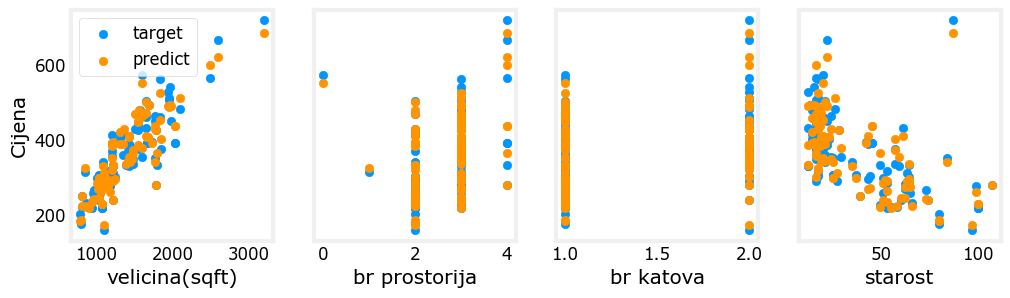

In [29]:

fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred_sgd,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Cijena"); ax[0].legend();

plt.show()